/Users/jvl2xv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/Users/jvl2xv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in subtract


[             nan   1.18337107e-82   2.15070973e-45 ...,   4.38920285e-03
   4.39033013e-03   4.39145952e-03]


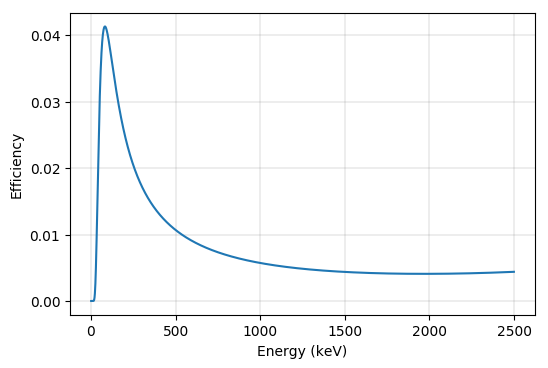

82


In [4]:
import numpy.random

import scipy
import scipy.optimize
import scipy.constants
import math
import numpy 
import uncertainties
import uncertainties.unumpy 

import matplotlib.axes
import matplotlib.pyplot
import scipy.misc
import scipy.special
import scipy.stats
from random import *
from scipy.special import xlogy
import sys
from scipy.stats import norm

from scipy.optimize import curve_fit


from math import *

from scipy.optimize import curve_fit

def efficiency(e): 
    E = numpy.log((8.415*10**2)/e)
    return numpy.exp(-5.018 + (8.753*10**(-1))*E + (1.474*10**(-1))*E**2 - (1.590*10**(-1))*E**3 + (8.997*10**(-2))*E**4 - (2.401*10**(-2))*E**5)

energies_keV = numpy.arange(0,2500)
print(efficiency(energies_keV))


matplotlib.pyplot.figure(dpi=100)
matplotlib.pyplot.plot(energies_keV, efficiency(energies_keV))
matplotlib.pyplot.xlabel('Energy (keV)')
matplotlib.pyplot.ylabel("Efficiency")
matplotlib.pyplot.grid(b=None, which='major', axis='both', color='grey', linestyle='-', linewidth=.2)
matplotlib.pyplot.show()

print(numpy.argmax(numpy.nan_to_num(efficiency(energies_keV))))


In [3]:
# Num	ROI_Start	ROI_End	Peak_Centroid	Energy_keV	FWHM_keV	Net_Area	Net_Area_Ucert	Continuum_Counts
# 4 = energy
# 6 = area
# 7 = area uncertainty


#Energy (keV) Calc Sim 
energy_activity = numpy.loadtxt('Calc_Sim_Activities.txt',skiprows=1)
sim = 100000000
vol = 0.000125
actual = 9.61E+15
energy_activity[:,2] = energy_activity[:,2]*(actual/sim)



A_livetime =  345600
B_livetime =   518400
C_livetime =   604800
D_livetime =   247515.79
Eff_livetime =   86961.2

#live_times = numpy.loadtxt("/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/Logan_Gamma/txt_output_fits/Live_times.txt",skiprows=0)
# Raw data from gamma vision: Num	ROI_Start	ROI_End	Peak_Centroid	Energy_keV	FWHM_keV	Net_Area	Net_Area_Ucert	Continuum_Counts
# no rad
a_fits = numpy.loadtxt("/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/Logan_Gamma/txt_output_fits/A_GaAs_PeakFit.txt",skiprows=5)
# 10 krad
b_fits = numpy.loadtxt("/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/Logan_Gamma/txt_output_fits/B_GaAs_PeakFit.txt",skiprows=5)
# 100 krad
c_fits = numpy.loadtxt("/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/Logan_Gamma/txt_output_fits/C_GaAs_PeakFit.txt",skiprows=5)
# 1 Mrad
d_fits = numpy.loadtxt("/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/Logan_Gamma/txt_output_fits/D_GaAs_PeakFit.txt",skiprows=5)


a_area_areaUncert = uncertainties.unumpy.uarray(a_fits[:,6],a_fits[:,7])
b_area_areaUncert = uncertainties.unumpy.uarray(b_fits[:,6],b_fits[:,7])
c_area_areaUncert = uncertainties.unumpy.uarray(c_fits[:,6],c_fits[:,7])
d_area_areaUncert = uncertainties.unumpy.uarray(d_fits[:,6],d_fits[:,7])



In [6]:
# 6 = area
# 7 = area uncert

# GET DECAY RATE

a_activity_activityUncert = a_area_areaUncert/A_livetime
b_activity_activityUncert = b_area_areaUncert/B_livetime
c_activity_activityUncert = c_area_areaUncert/C_livetime
d_activity_activityUncert = d_area_areaUncert/D_livetime


print(sum(d_activity_activityUncert))

# SUBTRACT BACKGROUND
# initialize
b_activity_activityUncert_BGcorrected = b_activity_activityUncert
c_activity_activityUncert_BGcorrected = c_activity_activityUncert
d_activity_activityUncert_BGcorrected = d_activity_activityUncert



tolerance_voltage_for_match = 1.8
background_counter = 0
# for each background peak (sample a)
for background_centroid in a_fits[:,3]:
    other_counter = 0
    # for each actual sample
    for other_centroid in b_fits[:,3]:
        if (abs(background_centroid - other_centroid) < tolerance_voltage_for_match):
            b_activity_activityUncert_BGcorrected[other_counter] = b_activity_activityUncert[other_counter] - a_activity_activityUncert[background_counter]
            break
        other_counter = other_counter + 1
    other_counter = 0
    # for each actual sample
    for other_centroid in c_fits[:,3]:
        if (abs(background_centroid - other_centroid) < tolerance_voltage_for_match):
            c_activity_activityUncert_BGcorrected[other_counter] = c_activity_activityUncert[other_counter] - a_activity_activityUncert[background_counter]
            break
        other_counter = other_counter + 1
    other_counter = 0
    # for each actual sample
    for other_centroid in d_fits[:,3]:
        if (abs(background_centroid - other_centroid) < tolerance_voltage_for_match):
            d_activity_activityUncert_BGcorrected[other_counter] = d_activity_activityUncert[other_counter] - a_activity_activityUncert[background_counter]
            #print('matched it', a_fits[background_counter,4], 'keV')
        other_counter = other_counter + 1    
    background_counter = background_counter + 1
    
# INCORPORTATE EFFICIENCY

b_activity_activityUncert_BGcorrected_effCorrected = b_activity_activityUncert_BGcorrected/efficiency(b_fits[:,4])
c_activity_activityUncert_BGcorrected_effCorrected = c_activity_activityUncert_BGcorrected/efficiency(c_fits[:,4])
d_activity_activityUncert_BGcorrected_effCorrected = d_activity_activityUncert_BGcorrected/efficiency(d_fits[:,4])



1.994+/-0.005
[0.08328147446361435+/-0.015190174869748035
 2.538743745570376+/-0.024539562140676728
 10.92729728909031+/-0.054036040431306456
 0.013938614379568746+/-0.018733763745268688
 0.035980634901899844+/-0.008370941370692725
 0.022661624029511312+/-0.009831205482582128
 0.007294113525564621+/-0.009406718489498039
 0.01619637898950349+/-0.014190896102157548
 0.19151464255463327+/-0.010031958108686418
 0.9328467084032017+/-0.031008002061131402
 3.3542253175382983+/-0.03922533742335446
 -0.026732984356155835+/-0.031497570211257285
 0.0037240671244274394+/-0.02305785560619179
 0.02110449202618042+/-0.057130272162744224
 0.04925928566797671+/-0.037004026132345776
 -0.021044208153395572+/-0.04291987449961546
 3.334097156295797+/-0.04606055221422644
 1.4705318454575929+/-0.04902284180482995
 -0.050628780239762604+/-0.05637333535632974
 0.05161841361978679+/-0.0464542044406696
 -0.05179205109968371+/-0.06462658682602669
 1.0190582911435744+/-0.07536427175436201
 55.994085897217886+/-0.1

In [9]:
# Get the total experimental activity
counter = 0
for energy in d_fits[:,4]:
    
    print(energy, d_activity_activityUncert_BGcorrected_effCorrected[counter])
    
    # remove the 511
    if energy == 511.01:
        d_activity_activityUncert_BGcorrected_effCorrected[counter] = 0
        
    
    counter += 1


print('total experimental activity without the 511: ', sum(d_activity_activityUncert_BGcorrected_effCorrected))

43.51 0.083+/-0.015
45.92 2.539+/-0.025
53.43 10.93+/-0.05
63.25 0.014+/-0.019
66.1 0.036+/-0.008
74.84 0.023+/-0.010
77.16 0.007+/-0.009
92.69 0.016+/-0.014
96.76 0.192+/-0.010
121.15 0.933+/-0.031
136.02 3.35+/-0.04
143.73 -0.027+/-0.031
154.08 0.004+/-0.023
185.71 0.02+/-0.06
198.57 0.05+/-0.04
238.6 -0.02+/-0.04
264.68 3.33+/-0.05
279.54 1.47+/-0.05
295.25 -0.05+/-0.06
303.82 0.05+/-0.05
351.92 -0.05+/-0.06
400.66 1.02+/-0.08
511.01 0
583.28 -0.16+/-0.07
595.92 46.37+/-0.16
609.0 0.91+/-0.06
630.0 0.342+/-0.022
634.8 11.96+/-0.08
727.63 -0.06+/-0.05
795.08 -0.08+/-0.05
834.18 3.50+/-0.07
911.31 -0.07+/-0.06
964.85 0.022+/-0.028
969.05 -0.07+/-0.04
1000.87 0.06+/-0.04
1077.47 0.34+/-0.05
1106.57 0.59+/-0.06
1115.58 8.69+/-0.08
1120.32 -0.17+/-0.06
1173.15 0.07+/-0.07
1204.11 0.20+/-0.05
1238.09 -0.03+/-0.07
1293.57 0.15+/-0.05
1332.15 0.11+/-0.05
1377.39 0.03+/-0.04
1407.73 -0.039+/-0.034
1460.52 -0.88+/-0.12
1495.89 0.019+/-0.025
1587.58 -0.035+/-0.024
1591.96 -0.054+/-0.028
1728.8

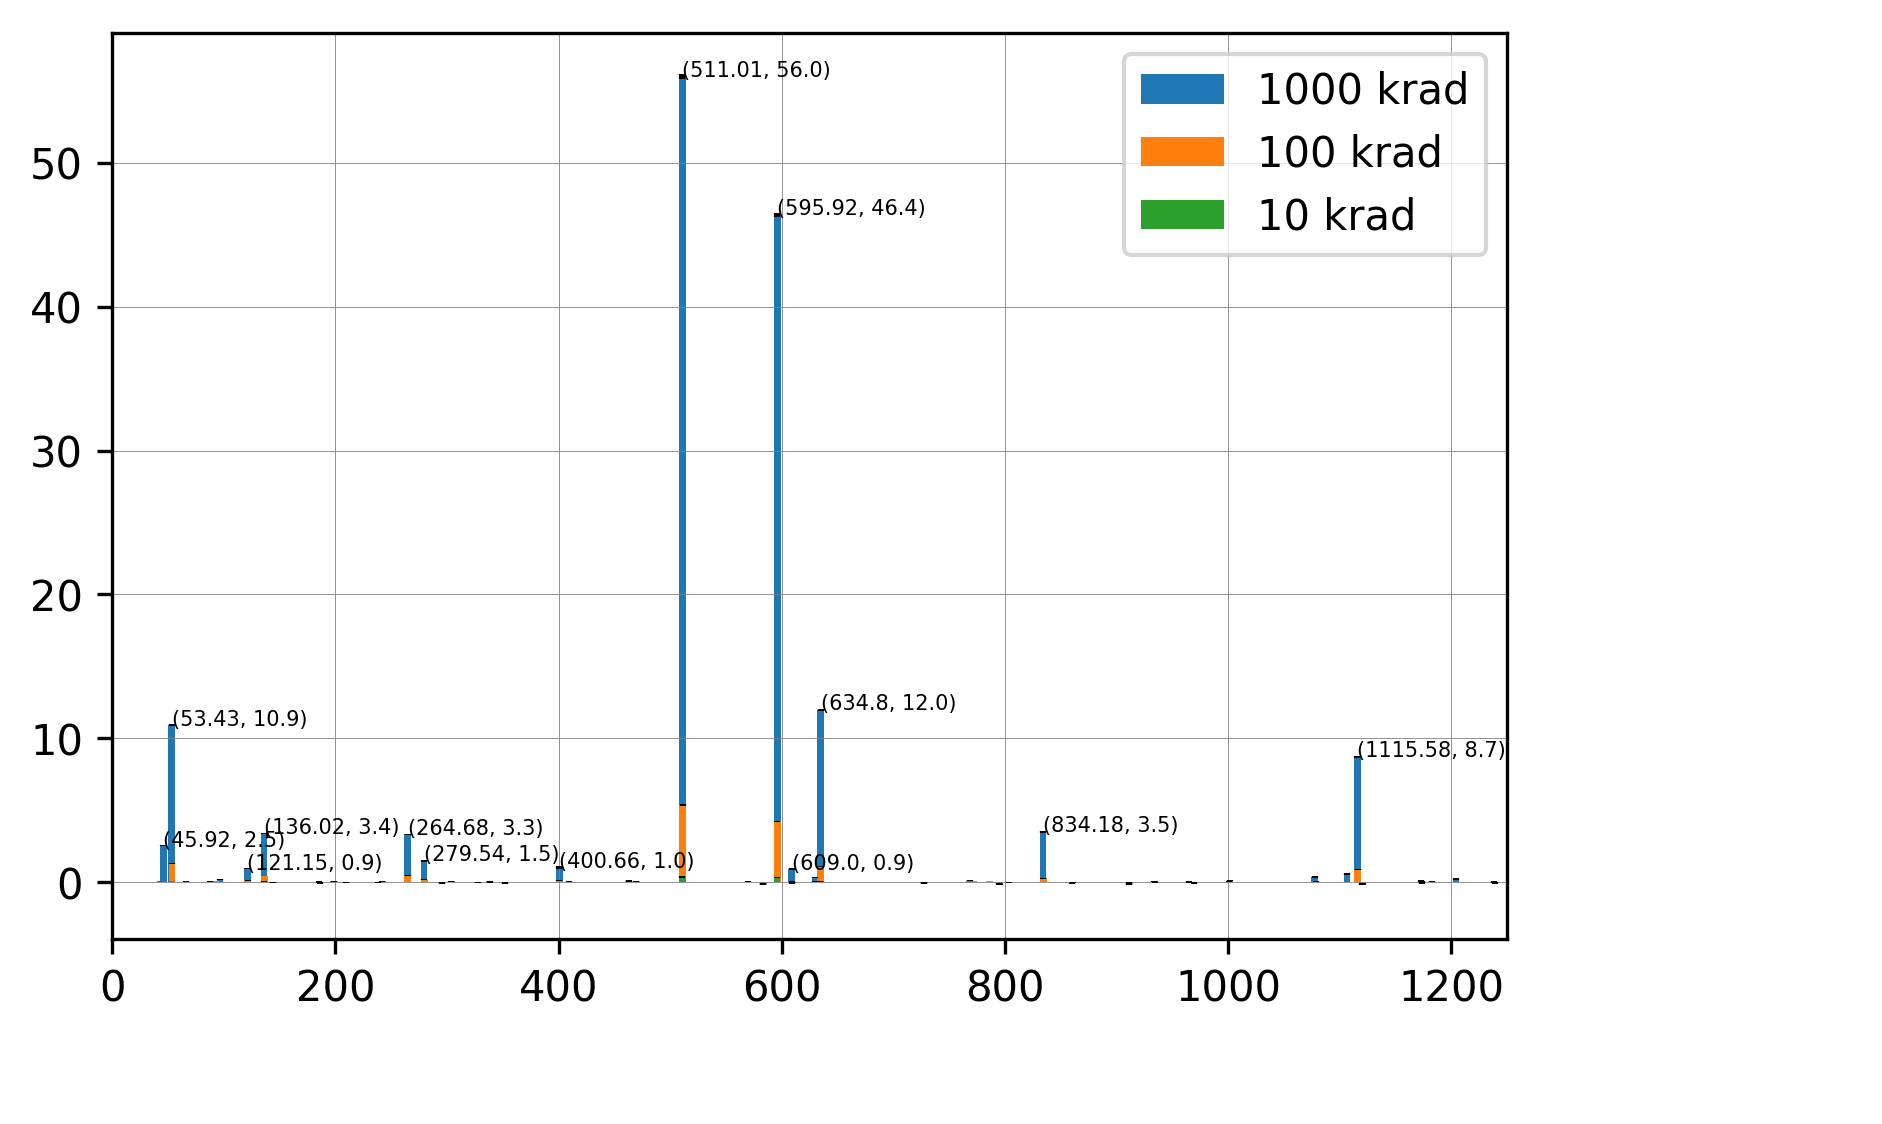

In [5]:
fig = matplotlib.pyplot.figure(dpi=300)
ax = fig.add_subplot(111)

es = d_fits[:,4]
vals = uncertainties.unumpy.nominal_values(d_activity_activityUncert_BGcorrected_effCorrected)



uncerts = uncertainties.unumpy.std_devs(d_activity_activityUncert_BGcorrected_effCorrected)
# plot
matplotlib.pyplot.bar(es,vals, yerr=uncerts,width=6,label=es)

counter = 0
for xy in zip(es,numpy.round(vals,1)): 
    if vals[counter] > .7:
        ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data',fontsize=5,color='black') 
    else:
        ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data',fontsize=4,color='black',alpha=0) 

    counter = counter + 1


es = c_fits[:,4]
vals = uncertainties.unumpy.nominal_values(c_activity_activityUncert_BGcorrected_effCorrected)
uncerts = uncertainties.unumpy.std_devs(c_activity_activityUncert_BGcorrected_effCorrected)
# plot
matplotlib.pyplot.bar(es,vals, yerr=uncerts,width=6,label=es)

es = b_fits[:,4]
vals = uncertainties.unumpy.nominal_values(b_activity_activityUncert_BGcorrected_effCorrected)
uncerts = uncertainties.unumpy.std_devs(b_activity_activityUncert_BGcorrected_effCorrected)
# plot
matplotlib.pyplot.bar(es,vals, yerr=uncerts,width=6,label=es)



matplotlib.pyplot.legend(['1000 krad','100 krad','10 krad'])
#matplotlib.pyplot.xlabel('Energy (keV)')
#matplotlib.pyplot.ylabel("Count Rate (Bq)")
matplotlib.pyplot.grid(b=None, which='major', axis='both', color='grey', linestyle='-', linewidth=.2)
matplotlib.pyplot.xlim([0,1250])
matplotlib.pyplot.show()








In [15]:
filename = "/Users/jvl2xv/anaconda/AFRL_RV/Transmutation/FinalExprData_1Mrad_E_Count_Stdev.txt"

toPrint = numpy.zeros([len(vals),3])
toPrint[:,0] = d_fits[:,4]
toPrint[:,1] = uncertainties.unumpy.nominal_values(d_activity_activityUncert_BGcorrected_effCorrected)
toPrint[:,2] = uncertainties.unumpy.std_devs(d_activity_activityUncert_BGcorrected_effCorrected)

numpy.savetxt(filename, toPrint)
